In [26]:
import sys
import os
# go to upper diretory
sys.path.append(os.path.abspath('./../../'))
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display_html
from tabulate import tabulate
from sklearn.preprocessing import minmax_scale
from Audio_Sentiment_Analysis.utils.Configuration import Configuration

In [27]:
EXTRACTED_FEATURES_FILE = 'extracted_features_ent05.csv'
SCALED_FEATURES = 'scaled_features.csv'
CONFIG_FILE = f"{os.path.abspath('./../../')}/Audio_Sentiment_Analysis/data/config.json"
config = Configuration.load_json(CONFIG_FILE)
pd.options.display.max_columns = None

### Load the processed features writen in the dataset

In [28]:
df = pd.read_csv(EXTRACTED_FEATURES_FILE)
print(df.shape)
df = df.sort_values(['Subject', 'Emotion', 'Gender'], ascending = (True, True, True))
df = df.set_index('Subject')
df

(1287, 41)


,File,Gender,Emotion,Emotion_Id,mel_mean,mel_min,mel_max,mel_var,mel_std,mean_chroma_stft,mean_rms,mean_spectral_centroid,mean_spectral_contrast,mean_spectral_bandwidth,mean_spectral_rolloff,mean_zero_crossing_rate,var_zero_crossing_rate,std_zero_crossing_rate,spikes_zero_crossing_rate,sum_zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8,mfcc9,mfcc10,mfcc11,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20
Subject,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,s1_an_1,m,anger,0,5.470246,4.425599e-10,2683.060303,2835.492676,53.249344,0.402497,0.129479,1814.026368,22.718679,1834.495092,3811.157227,0.093647,0.001995,0.044666,6,13.766113,-171.056549,115.938042,-28.566433,21.314878,-26.507704,10.144446,-22.394417,-6.446075,-20.058737,-9.614692,-15.731797,-8.805966,-2.915169,-12.226694,-5.387331,-4.913488,-9.523164,-1.791623,-3.507744,0.083974
1,s1_an_2,m,anger,0,4.795432,3.266728e-10,1598.459473,1602.659546,40.033230,0.369817,0.122001,1813.929245,22.243432,1772.517500,3602.609923,0.095251,0.004444,0.066661,8,11.715820,-187.978119,114.721764,-41.258282,22.174334,-12.715221,11.881121,-22.636301,-9.284859,-23.113136,-7.031469,-15.980973,-11.601790,-5.727098,-6.378960,-7.155036,-7.385511,-8.306025,4.346861,-6.595266,-2.742662
1,s1_an_5,m,anger,0,6.344573,4.247520e-10,4932.327637,6391.681152,79.947990,0.312011,0.140534,1577.596083,23.661057,1621.112545,3149.887457,0.072095,0.000541,0.023251,4,8.867676,-180.083939,119.054886,-42.182270,26.999893,-6.590928,8.636041,-17.951387,-20.642817,-24.792250,-4.610571,-18.438587,-11.906024,-3.913879,-11.295942,-3.214928,-6.571509,-0.506520,1.930403,-6.855784,-2.346526
1,s1_an_4,m,anger,0,7.300478,3.510179e-10,3062.532715,4610.922363,67.903770,0.272837,0.155781,1578.663080,23.566948,1679.770568,3222.159447,0.068912,0.000354,0.018807,0,7.304688,-166.445877,122.271973,-42.199047,19.365204,-21.122906,8.933196,-21.792807,-10.018277,-22.990005,-9.038509,-19.050367,-9.762544,0.404813,-14.561901,-6.730536,-4.809193,-5.546733,2.948940,-6.117626,-3.003350
1,s1_an_3,m,anger,0,3.334237,3.032449e-10,689.850098,542.464478,23.290867,0.402758,0.093039,1699.189320,21.846660,1764.541591,3558.226103,0.089708,0.000406,0.020160,0,10.675293,-241.878052,123.269180,-36.750164,15.108225,-17.863935,12.198894,-16.139629,-8.320073,-9.156641,-3.037857,-7.307014,-2.118013,-5.378597,-6.666719,-4.749491,-4.346241,-5.281549,3.802923,-7.263710,3.085279
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43,s43_su_1,m,surprise,5,0.769080,7.201543e-10,343.847076,67.194626,8.197233,0.331168,0.044888,2052.206978,21.497085,2161.771189,4606.111654,0.079783,0.001808,0.042515,6,6.462402,-336.866089,92.766159,-11.945115,21.954580,-17.095549,14.651039,-26.619286,-25.634380,-13.413041,-14.144950,-5.024630,6.116760,-10.426900,0.831624,2.825282,-2.409575,-10.828929,-1.298723,-8.621070,-5.182372
43,s43_su_2,m,surprise,5,0.556107,5.498184e-10,230.432190,23.537956,4.851593,0.380171,0.039031,2454.031082,20.405096,2270.482310,5048.431866,0.118452,0.006708,0.081905,6,9.239258,-319.413849,81.346947,-16.686415,29.972387,-6.042556,16.341099,-33.199039,-16.532486,-12.359122,-4.888298,-6.806831,-1.223010,-10.650027,1.095915,-2.858048,-0.077681,-17.657351,0.739707,-8.174618,-4.075395
43,s43_su_5,m,surprise,5,0.360079,4.762937e-10,329.025574,26.714954,5.168651,0.457406,0.025236,2454.743336,19.416661,2309.675541,4884.228516,0.131743,0.012873,0.113460,9,19.366211,-417.796600,86.241020,12.699595,22.715195,-1.217471,10.950769,-8.263742,-3.265463,-9.827182,-1.790178,-4.792536,-2.122405,-5.465124,0.598570,-3.640218,0.477983,-7.970364,-2.126075,-4.782431,-4.928042


### Min Max Scaling all features
### Store Scaled features in a new file

In [29]:
df_scaled = df.copy(deep=True)
df_scaled[df_scaled.columns[3:]] = minmax_scale(df_scaled[df_scaled.columns[3:]], config.scale_range)
df_scaled.to_csv(SCALED_FEATURES)
df_scaled

,File,Gender,Emotion,Emotion_Id,mel_mean,mel_min,mel_max,mel_var,mel_std,mean_chroma_stft,mean_rms,mean_spectral_centroid,mean_spectral_contrast,mean_spectral_bandwidth,mean_spectral_rolloff,mean_zero_crossing_rate,var_zero_crossing_rate,std_zero_crossing_rate,spikes_zero_crossing_rate,sum_zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8,mfcc9,mfcc10,mfcc11,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20
Subject,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,s1_an_1,m,anger,0.0,0.749187,0.226190,0.543893,0.383464,0.619121,0.528081,0.827658,0.195442,0.740029,0.298054,0.316421,0.181458,0.041076,0.148333,0.166667,0.296484,0.917193,0.695340,0.521300,0.425891,0.345490,0.606309,0.534112,0.498706,0.482930,0.380977,0.235475,0.421656,0.488674,0.201833,0.260923,0.350065,0.261784,0.296907,0.501349,0.324593
1,s1_an_2,m,anger,0.0,0.656711,0.166961,0.323958,0.216739,0.465380,0.436557,0.778661,0.195401,0.672130,0.251716,0.264627,0.188436,0.099728,0.265159,0.222222,0.237680,0.874480,0.684851,0.405515,0.436568,0.542730,0.633834,0.529863,0.432751,0.416104,0.431380,0.227772,0.347832,0.408824,0.319372,0.228203,0.271015,0.289062,0.479564,0.406021,0.246796
1,s1_an_5,m,anger,0.0,0.869004,0.217088,1.000000,0.864392,0.929704,0.274662,0.900099,0.094041,0.874666,0.138516,0.152191,0.087667,0.006237,0.034585,0.111111,0.155993,0.894406,0.722219,0.397085,0.496512,0.630310,0.582402,0.612145,0.168864,0.379367,0.478617,0.151794,0.339799,0.460314,0.220541,0.301134,0.297045,0.463861,0.407659,0.397978,0.257698
1,s1_an_4,m,anger,0.0,1.000000,0.179403,0.620843,0.623567,0.789595,0.164950,1.000000,0.094499,0.861221,0.182372,0.170140,0.073816,0.001760,0.010980,0.000000,0.111166,0.928831,0.749963,0.396932,0.401672,0.422495,0.587112,0.544678,0.415711,0.418798,0.392219,0.132880,0.396398,0.582953,0.154896,0.236060,0.353401,0.350902,0.437967,0.420769,0.239621
1,s1_an_3,m,anger,0.0,0.456470,0.154987,0.139710,0.073361,0.270617,0.528811,0.588888,0.146191,0.615444,0.245752,0.253604,0.164317,0.003023,0.018166,0.000000,0.207837,0.738427,0.758562,0.446642,0.348791,0.469100,0.638870,0.643966,0.455166,0.721455,0.509304,0.495930,0.598252,0.418720,0.313589,0.272729,0.368205,0.356845,0.463378,0.385383,0.407198
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43,s43_su_1,m,surprise,1.0,0.104944,0.368067,0.069548,0.009087,0.095035,0.328314,0.273384,0.297594,0.565500,0.542745,0.513851,0.121123,0.036584,0.136906,0.166667,0.087008,0.498659,0.495512,0.672933,0.433838,0.480089,0.677735,0.459910,0.052892,0.628330,0.292583,0.566491,0.815692,0.275362,0.464305,0.412938,0.430135,0.232520,0.311573,0.343475,0.179648
43,s43_su_2,m,surprise,1.0,0.075758,0.281009,0.046549,0.003183,0.056115,0.465554,0.235008,0.469930,0.409488,0.624024,0.623704,0.289405,0.153974,0.346126,0.166667,0.166650,0.542712,0.397035,0.629679,0.533437,0.638152,0.704521,0.344348,0.264362,0.651389,0.473198,0.511394,0.621884,0.269026,0.469617,0.307740,0.504705,0.079485,0.372229,0.357259,0.210115
43,s43_su_5,m,surprise,1.0,0.048894,0.243431,0.066542,0.003613,0.059804,0.681863,0.144621,0.470235,0.268271,0.653328,0.582923,0.347245,0.301641,0.513735,0.250000,0.457098,0.294376,0.439241,0.897763,0.443286,0.707153,0.619089,0.782291,0.572603,0.706785,0.533648,0.573666,0.598136,0.416263,0.459621,0.293262,0.522474,0.296585,0.286955,0.461993,0.186648


## Querying data
### - Group by subject and emotions and calculate the respective mean values

In [30]:
df.groupby(['Subject', 'Emotion']).mean()

Emotion_Id  mel_mean       mel_min      mel_max  \
Subject Emotion                                                      
1       anger             0.0  5.448993  3.696495e-10  2593.246045   
        disgust           1.0  2.203773  3.467299e-10  1275.522034   
        fear              2.0  2.062133  3.833569e-10  1171.522021   
        happiness         3.0  3.596385  4.827979e-10  1385.045288   
        sadness           4.0  0.860076  3.661279e-10   618.971100   
...                       ...       ...           ...          ...   
43      disgust           1.0  0.260711  5.670453e-10   170.781540   
        fear              2.0  0.094042  5.261877e-10    36.785215   
        happiness         3.0  0.582320  6.273955e-10   247.009872   
        sadness           4.0  0.048736  4.942486e-10    18.252147   
        surprise          5.0  0.579078  5.601459e-10   300.219910   

                       mel_var    mel_std  mean_chroma_stft  mean_rms  \
Subject Emotion                                                         
1       anger      3196.644043  52.885040          0.351984  0.128167   
        disgust     629.788232  23.311563          0.396743  0.073791   
        fear        953.791905  24.186283          0.347003  0.069430   
        happiness  1395.557080  34.941695          0.373238  0.101833   
        sadness      97.350328   9.813401          0.405850  0.043551   
...                        ...        ...               ...       ...   
43      disgust      11.001651   3.229945          0.381820  0.023073   
        fear          1.163915   0.951147          0.390809  0.013943   
        happiness    37.168540   6.034569          0.341275  0.038977   
        sadness       0.321057   0.524530          0.460991  0.008912   
        surprise     41.775037   6.342011          0.380094  0.036641   

                   mean_spectral_centroid  mean_spectral_contrast  \
Subject Emotion                                                     
1       anger                 1696.680819               22.807355   
        disgust               2206.716963               21.926296   
        fear                  1877.335301               22.588248   
        happiness             1988.367154               21.849093   
        sadness               1918.577138               21.463444   
...                                   ...                     ...   
43      disgust               2718.718862               20.497144   
        fear                  2515.262447               20.325862   
        happiness             2351.120386               21.719793   
        sadness               2634.405000               18.977522   
        surprise              2197.980070               20.591357   

                   mean_spectral_bandwidth  mean_spectral_rolloff  \
Subject Emotion                                                     
1       anger                  1734.487459            3468.808031   
        disgust                1952.310647            4287.188569   
        fear                   1852.591857            3838.981285   
        happiness              1917.113821            3988.430984   
        sadness                1961.970025            4058.874966   
...                                    ...                    ...   
43      disgust                2429.159594            5507.480810   
        fear                   2401.106509            5198.577407   
        happiness              2124.170285            4582.052529   
        sadness                2455.711054            5322.874585   
        surprise               2194.478818            4575.243787   

                   mean_zero_crossing_rate  var_zero_crossing_rate  \
Subject Emotion                                                      
1       anger                     0.083923                0.001548   
        disgust                   0.137325                0.006891   
        fear                      0.095356                0.004210   
        happ

### Group by emotions and calculate the respective mean values

In [31]:
emotion_df = df.groupby(['Emotion']).mean()
emotion_df

,Emotion_Id,mel_mean,mel_min,mel_max,mel_var,mel_std,mean_chroma_stft,mean_rms,mean_spectral_centroid,mean_spectral_contrast,mean_spectral_bandwidth,mean_spectral_rolloff,mean_zero_crossing_rate,var_zero_crossing_rate,std_zero_crossing_rate,spikes_zero_crossing_rate,sum_zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8,mfcc9,mfcc10,mfcc11,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20
Emotion,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
anger,0.0,1.964557,4.979867e-10,784.429963,471.027281,16.464125,0.372403,0.067751,2000.811022,21.369621,1924.474804,3962.216328,0.102801,0.004164,0.059579,8.544186,14.689882,-278.481153,106.161516,-27.923035,24.015693,-12.416330,-0.053820,-17.943442,-5.203580,-18.770545,-4.521821,-8.418275,-4.112626,-4.846844,-4.052627,-5.830057,-1.455091,-9.928850,-0.876386,-6.621366,-1.889102
disgust,1.0,1.085537,5.411402e-10,484.715439,223.896929,10.423483,0.392498,0.046428,2386.889376,20.903958,2107.383754,4647.360873,0.135805,0.008552,0.086644,9.576744,15.745873,-311.293719,90.023145,-17.722947,25.608714,-12.751904,6.985914,-21.166275,-2.767768,-16.949197,-3.661440,-5.956662,-2.856432,-4.887801,-1.424538,-4.765240,-0.485842,-8.915272,0.703952,-7.106214,-0.889335
fear,2.0,1.103661,5.532539e-10,473.599533,299.937834,10.902051,0.371906,0.044939,2259.412909,21.052414,2096.777359,4493.397170,0.118042,0.007611,0.079182,9.944186,14.251031,-326.442409,90.857612,-16.201496,29.666463,-12.309419,8.458796,-18.078241,-2.903553,-15.845514,-2.650422,-7.151599,-3.745748,-5.647146,-1.962507,-4.775109,-0.483097,-8.785083,-0.059577,-7.126618,-1.057489
happiness,3.0,1.685392,5.488081e-10,696.771334,459.780437,15.531277,0.382702,0.060792,2266.210799,21.063142,2018.206253,4377.868730,0.127312,0.008838,0.087531,8.466981,13.803794,-287.983906,93.911864,-24.533960,22.601120,-14.480257,4.588738,-21.658587,-3.942214,-17.342921,-2.727248,-6.783810,-4.810743,-6.267060,-2.332121,-4.471692,-1.114162,-8.712590,1.004717,-6.598014,-1.212690
sadness,4.0,0.438325,5.317130e-10,236.838715,56.091219,4.620724,0.403042,0.026262,2250.769442,20.459356,2148.438671,4585.939401,0.118091,0.007076,0.080863,10.190698,15.526092,-372.279800,96.234951,-8.827116,30.053425,-10.848830,12.574002,-15.485175,-1.202500,-13.655494,-0.990853,-4.256988,-1.888992,-4.167439,-0.866952,-4.439121,0.240384,-8.410702,0.338223,-6.548120,-0.679333
surprise,5.0,1.179027,5.742985e-10,494.933238,247.988765,11.071986,0.392663,0.047921,2087.606349,20.816989,2020.029361,4202.058283,0.108533,0.006450,0.074876,7.920930,12.155428,-319.715406,103.760099,-16.978441,24.240769,-13.288945,5.356678,-19.540477,-4.768674,-14.709988,-2.324629,-5.437851,-3.902965,-6.264960,-2.161812,-4.191923,-1.473215,-9.524304,-0.481577,-6.909619,-1.860890


### Group by genders and emotions and calculate the respective mean values

In [32]:
df.groupby(['Gender', 'Emotion']).mean()

Emotion_Id  mel_mean       mel_min     mel_max     mel_var  \
Gender Emotion                                                                 
f      anger             0.0  1.558979  4.267508e-10  691.905863  348.394819   
       disgust           1.0  1.182824  4.532641e-10  544.668524  291.174059   
       fear              2.0  1.044689  4.432154e-10  502.422195  281.898442   
       happiness         3.0  1.561080  4.550542e-10  651.055508  300.951370   
       sadness           4.0  0.355731  4.421617e-10  265.794107   50.762778   
       surprise          5.0  1.232838  4.529828e-10  567.863805  215.933457   
m      anger             0.0  2.043419  5.118381e-10  802.420760  494.872482   
       disgust           1.0  1.066620  5.582272e-10  473.057895  210.815264   
       fear              2.0  1.115127  5.746503e-10  467.995126  303.445493   
       happiness         3.0  1.709974  5.673470e-10  705.811186  491.187314   
       sadness           4.0  0.454385  5.491258e-10  231.208501   57.127305   
       surprise          5.0  1.168564  5.978876e-10  480.752295  254.221741   

                    mel_std  mean_chroma_stft  mean_rms  \
Gender Emotion                                            
f      anger      14.157091          0.353810  0.058261   
       disgust    11.936068          0.379628  0.048030   
       fear       11.358913          0.345696  0.043606   
       happiness  13.921807          0.367950  0.060598   
       sadness     4.786785          0.364209  0.024020   
       surprise   12.175114          0.367681  0.049529   
m      anger      16.912715          0.376018  0.069597   
       disgust    10.129369          0.395001  0.046117   
       fear       10.813217          0.377002  0.045199   
       happiness  15.849534          0.385619  0.060830   
       sadness     4.588435          0.410593  0.026698   
       surprise   10.857489          0.397521  0.047608   

                  mean_spectral_centroid  mean_spectral_contrast  \
Gender Emotion                                                     
f      anger                 2125.544745               20.810672   
       disgust               2476.247562               20.432033   
       fear                  2426.155595               20.757799   
       happiness             2318.703709               20.648249   
       sadness               2352.330990               20.170894   
       surprise              2107.292247               20.497272   
m      anger                 1976.557243               21.478306   
       disgust               2369.514173               20.995721   
       fear                  2226.990720               21.109701   
       happiness             2255.830844               21.145183   
       sadness               2231.021363               20.515445   
       surprise              2083.778536               20.879156   

                  mean_spectral_bandwidth  mean_spectral_rolloff  \
Gender Emotion                                                     
f      anger                  1965.321103            4172.453914   
       disgust                2146.972130            4815.001152   
       fear                   2140.958270            4764.532840   
       happiness              1992.227236            4402.911599   
       sadness                2203.150927            4824.430724   
       surprise               1990.265903            4229.651054   
m      anger                  1916.532469            3921.336797   
       disgust                2099.686014            4614.764153   
       fear                   2088.186626            4440.676345   
       happiness              2023.343347            4372.916751   
       sadness                2137.800177            4539.566089   
       surprise               2025.816701            4196.693022   

                  mean_zero_crossing_rate  var_zero_crossing_rate  \
Gender Emotion                                                      
f      anger              

## Feature Analysis

### Bar Plots of Mel Spectogram Values

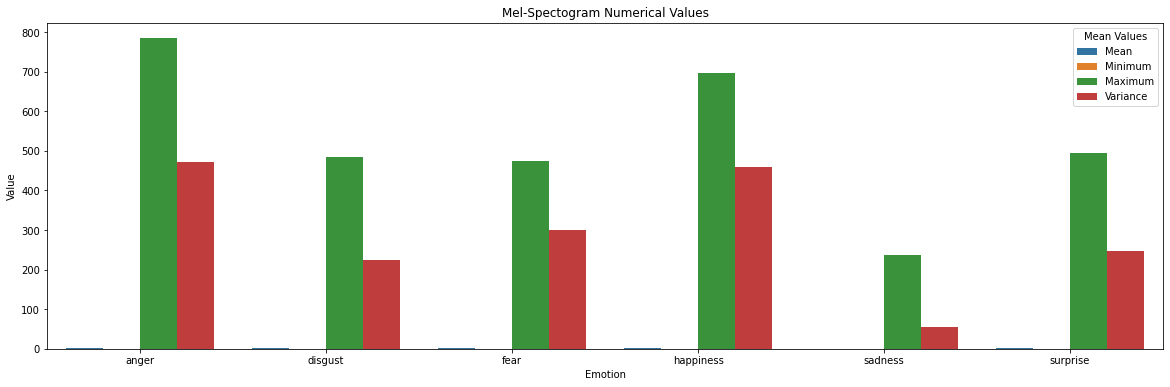

In [33]:
df_barplot = pd.DataFrame(
    zip(
        list(emotion_df.index.values)*6,
        ["Mean"]*6+["Minimum"]*6+["Maximum"]*6+["Variance"]*6+["Standard Deviation"]*6,
        list(emotion_df['mel_mean'].values)+list(emotion_df['mel_min'].values)+list(emotion_df['mel_max'].values)+\
            list(emotion_df['mel_var'].values)
    ),
    columns=["Emotion", "Mean Values", 'Value']
)

plt.figure(figsize=(20, 6))
plt.title("Mel-Spectogram Numerical Values")
sns.barplot(x="Emotion", hue="Mean Values", y="Value", data=df_barplot)
plt.show()

### Bar Plots of Spectral Values

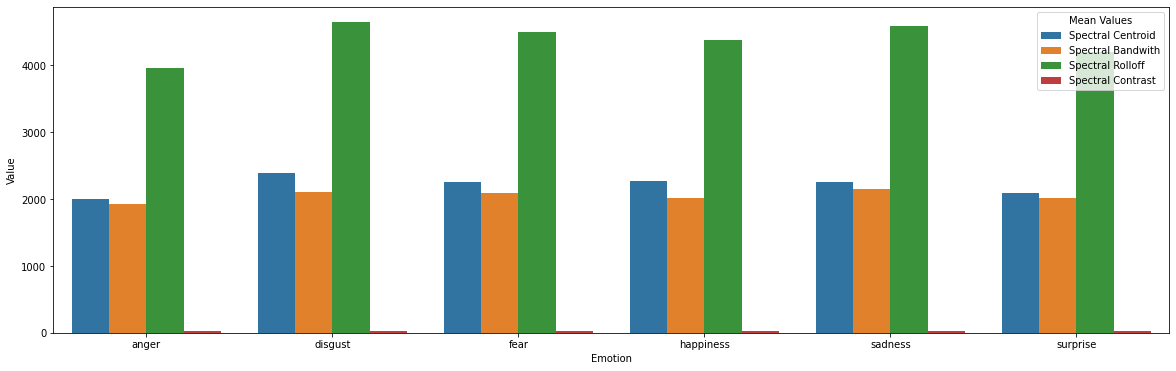

In [34]:
df_barplot = pd.DataFrame(
    zip(
        list(emotion_df.index.values)*6,
        ["Spectral Centroid"]*6+["Spectral Bandwith"]*6+
            ["Spectral Rolloff"]*6+["Spectral Contrast"]*6,
        list(emotion_df['mean_spectral_centroid'].values)+list(emotion_df['mean_spectral_bandwidth'].values)+\
            list(emotion_df['mean_spectral_rolloff'].values)+list(emotion_df['mean_spectral_contrast'].values)
    ),
    columns=["Emotion", "Mean Values", 'Value']
)

plt.figure(figsize=(20, 6))
sns.barplot(x="Emotion", hue="Mean Values", y="Value", data=df_barplot)
plt.show()

### Bar Plots of other Features

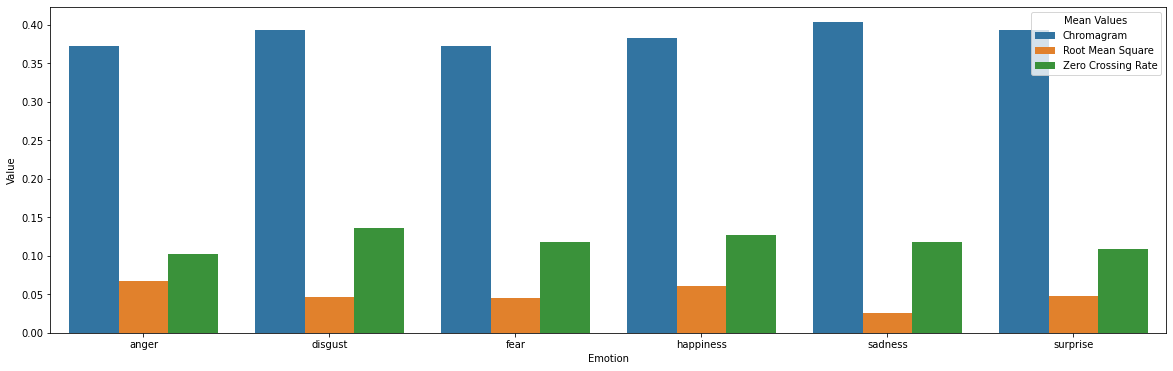

In [35]:
df_barplot = pd.DataFrame(
    zip(
        list(emotion_df.index.values)*6,
        ["Chromagram"]*6+["Root Mean Square"]*6+["Zero Crossing Rate"]*6,
        list(emotion_df['mean_chroma_stft'].values)+list(emotion_df['mean_rms'].values)+list(emotion_df['mean_zero_crossing_rate'].values)
    ),
    columns=["Emotion", "Mean Values", 'Value']
)

plt.figure(figsize=(20, 6))
sns.barplot(x="Emotion", hue="Mean Values", y="Value", data=df_barplot)
plt.show()

### Bar Plots of MFCC Values

## Features' Correlation with Emotion

In [36]:
df_corr = abs(df.corr()["Emotion_Id"]).sort_values()
display_html(tabulate(df_corr.items(), headers=["Feature", "Correlation Value"], tablefmt="html"), raw=True)

Feature,Correlation Value
mfcc5,0.00345004
mean_spectral_centroid,0.00397181
mfcc20,0.00774942
mfcc19,0.00978996
mfcc16,0.0169484
mfcc12,0.0196251
spikes_zero_crossing_rate,0.0219436
mfcc2,0.0238199
mean_zero_crossing_rate,0.0246027
mfcc18,0.0251572


# Single Feature Analysis


In [37]:
def analyse_feature(df, df_corr, feature):
    fig = plt.figure(figsize=(20, 11))
    fig.suptitle(feature, fontsize=18)

    grid = plt.GridSpec(3, 6, wspace=.6, hspace=.4)
    # y_ticks = np.arange(0.0, 1.1, 0.1)

    ax = plt.subplot(grid[0, :])
    ax.set_title("For All Subjects")
    sns.boxplot(x=df["Emotion"], y=df[feature], width=0.3, ax=ax)
    # ax.set_yticks(y_ticks)

    for i in range(1,6):
        if i < 3:
            r, c_s, c_f = 1, (i-1)*3, (i-1)*3+3
        else:
            r, c_s, c_f = 2, (i-3)*2, (i-3)*2+2

        ax = plt.subplot(grid[r, c_s:c_f])
        ax.set_title(f"For Subject {i}")
        subj_data = df.loc[df.index == i]
        sns.boxplot(x=subj_data["Emotion"], y=subj_data[feature], width=0.3, ax=ax);
        # ax.set_yticks(y_ticks)

    plt.show()

## Zero Crossing Rate Analysis
## Unnormalized data
### Mean Metric

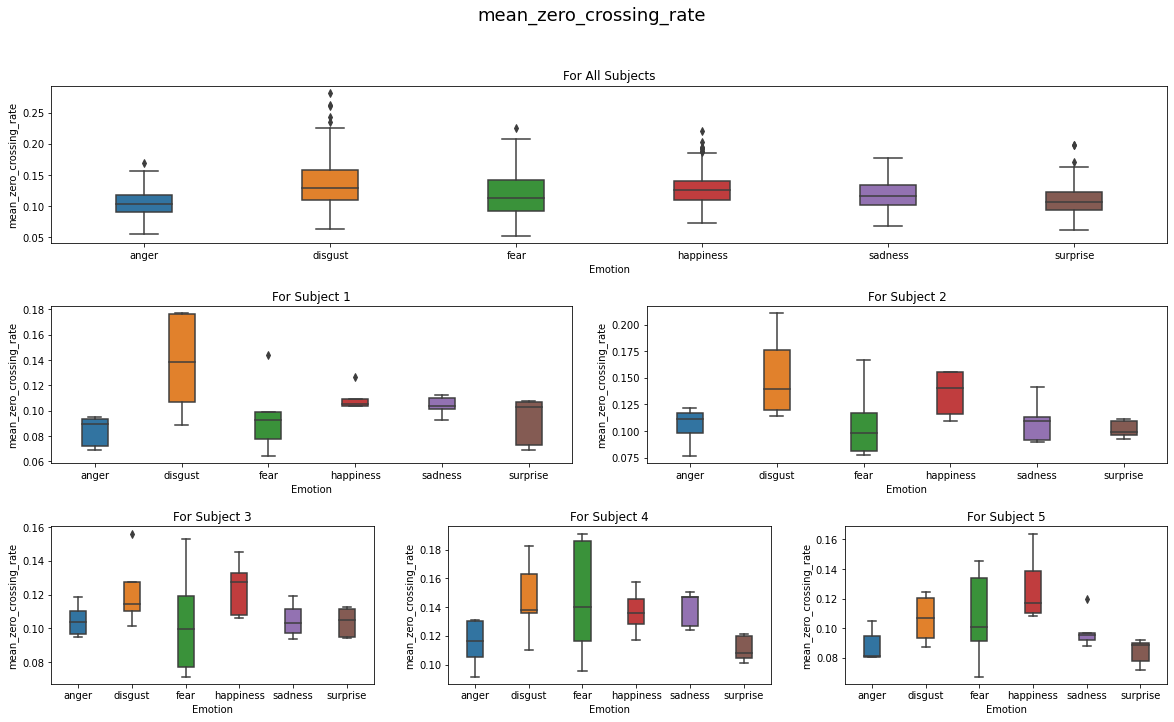

In [38]:
analyse_feature(df, df_corr, "mean_zero_crossing_rate")

### Variance Metric

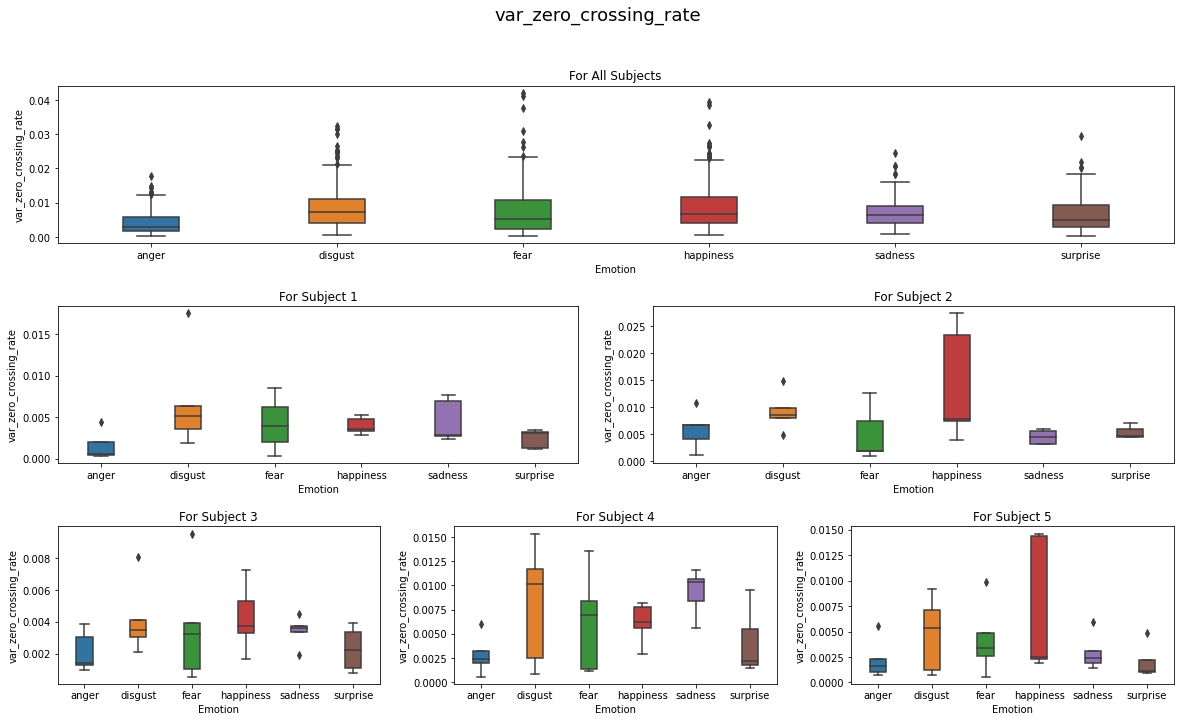

In [39]:
analyse_feature(df, df_corr, "var_zero_crossing_rate")

### Standard Deviation Metric

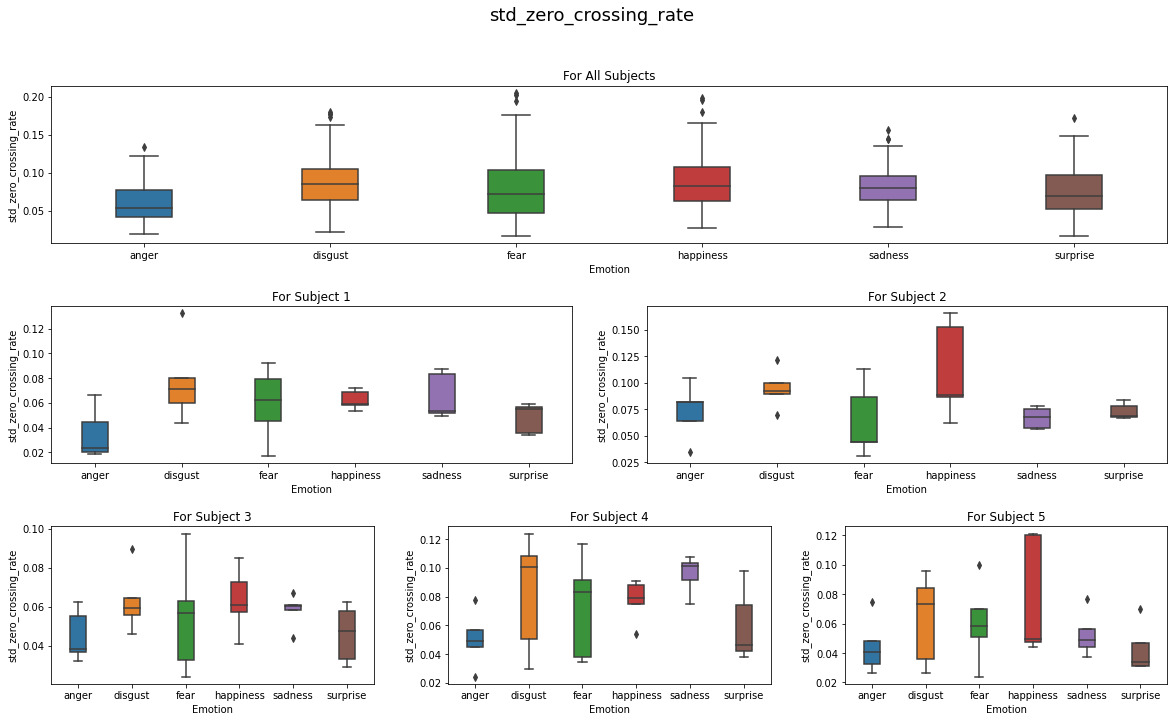

In [40]:
analyse_feature(df, df_corr, "std_zero_crossing_rate")

### Number of Spikes Metric

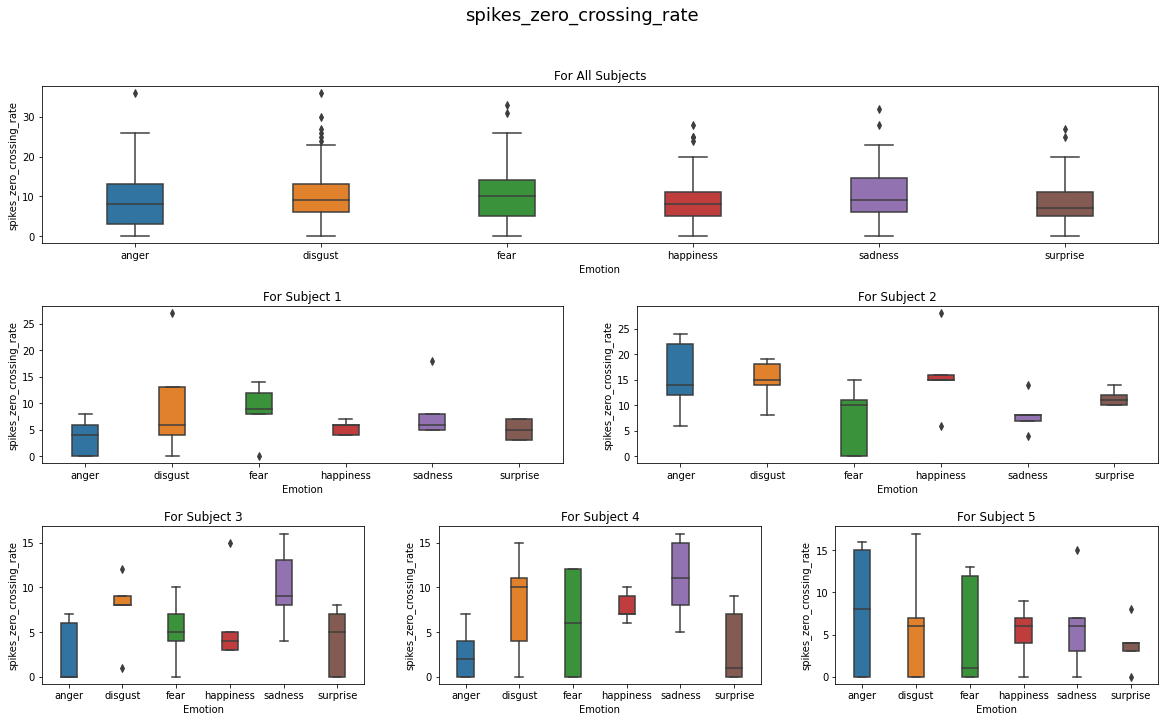

In [41]:
analyse_feature(df, df_corr, "spikes_zero_crossing_rate")

### Sum Metric

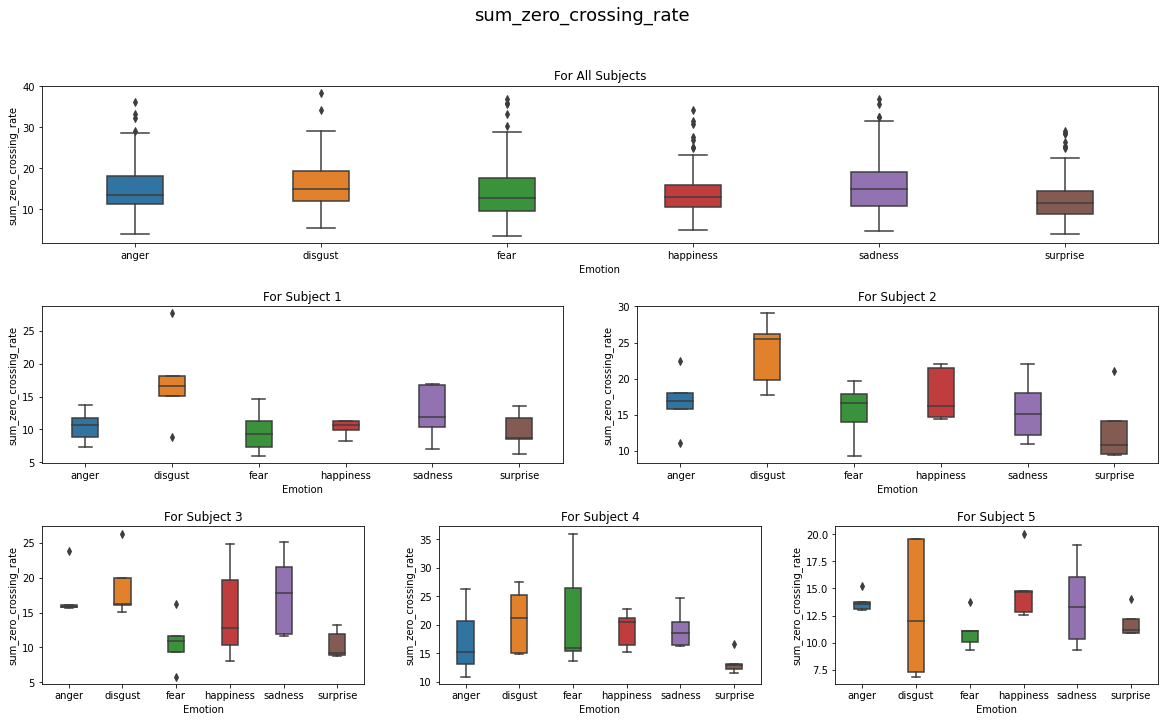

In [42]:
analyse_feature(df, df_corr, "sum_zero_crossing_rate")

### Variation for different emotions

In [60]:
def step_plot(df, num_utterances, feature):
    emotions = ['anger', 'happiness', 'sadness', 'disgust', 'fear', 'surprise']
    
    fig = plt.figure(figsize=(15, 6))
    fig.suptitle(f"{feature} variation for different emotions", fontsize=16)
    plt.xlabel("Number of the speech utterance")
    plt.ylabel(feature)

    x = list(range(1, num_utterances+1, 1))
    for i, emotion in enumerate(emotions):
        plt.plot(x, df.loc[df['Emotion'] == emotion][feature][:num_utterances], 'o-', label=emotion)
    plt.legend()
    plt.show()

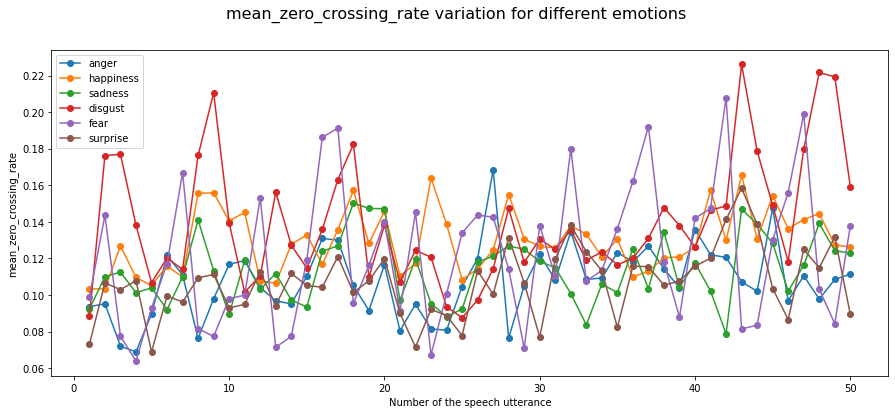

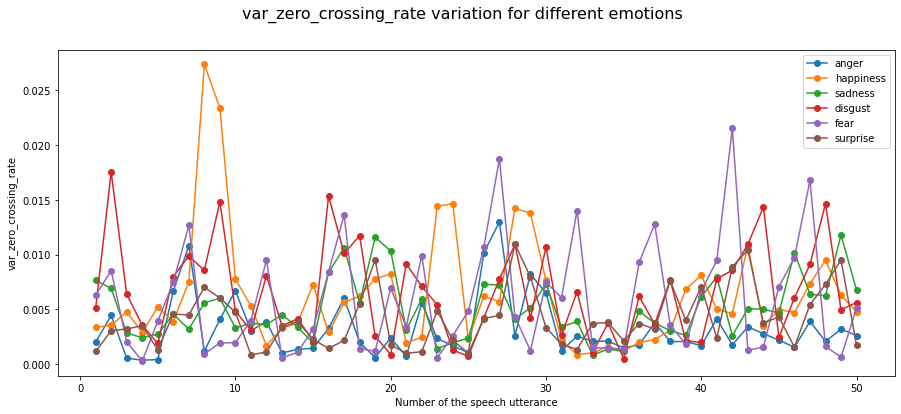

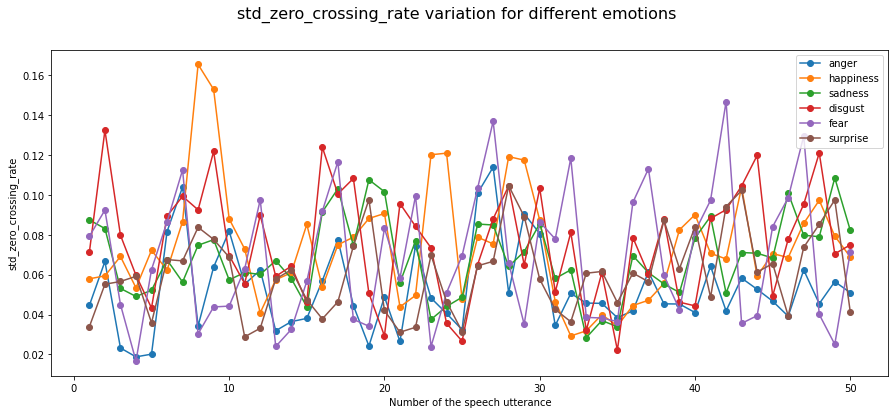

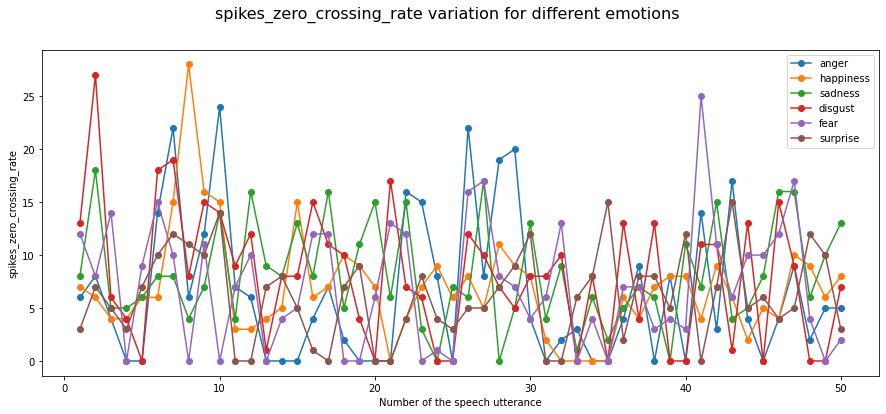

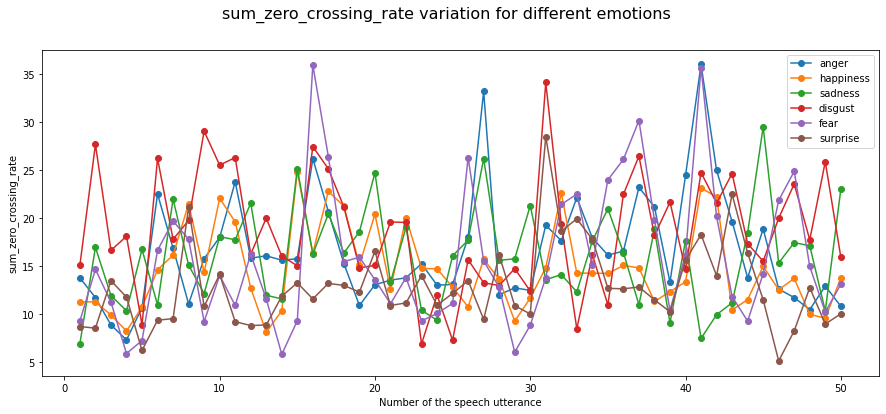

In [61]:
step_plot(df, 50, "mean_zero_crossing_rate")
step_plot(df, 50, "var_zero_crossing_rate")
step_plot(df, 50, "std_zero_crossing_rate")
step_plot(df, 50, "spikes_zero_crossing_rate")
step_plot(df, 50, "sum_zero_crossing_rate")

## Root Mean Square Energy Analysis

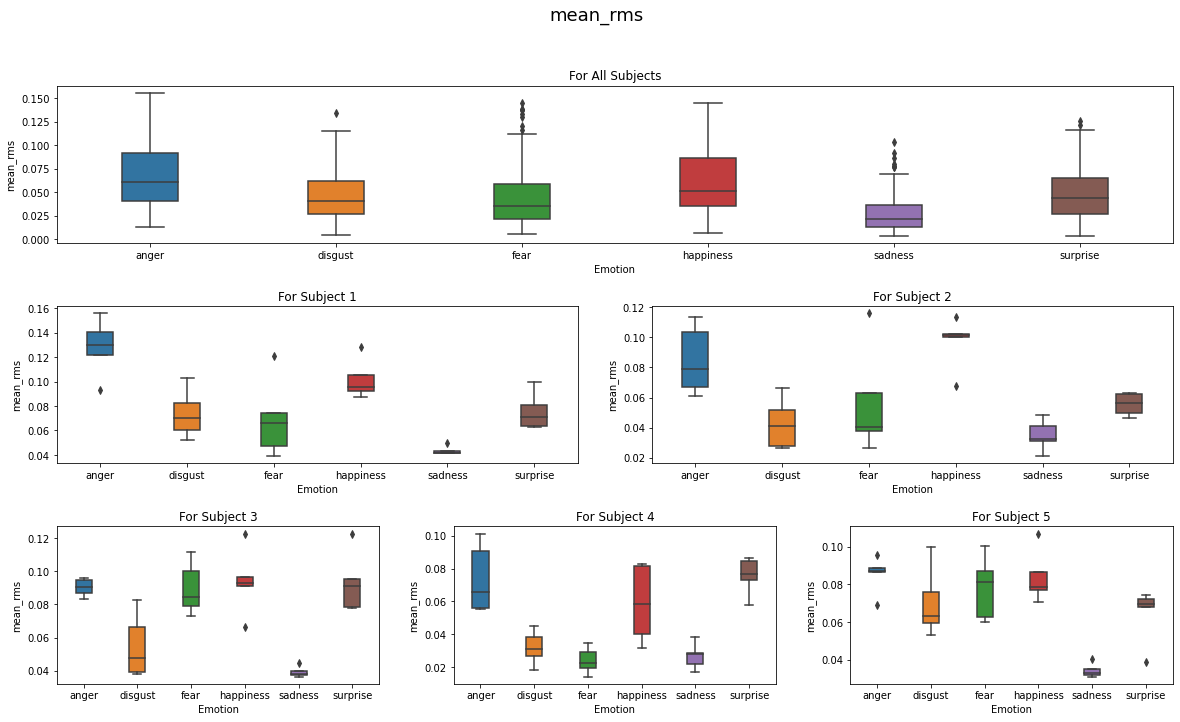

In [56]:
analyse_feature(df, df_corr, "mean_rms")